In [2]:
'''
Dataset Source
https://www.kaggle.com/iarunava/happy-house-dataset
''' 

'\nDataset Source\nhttps://www.kaggle.com/iarunava/happy-house-dataset\n'

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import random

In [3]:
filename = 'train_happy.h5'
f = h5py.File(filename, 'r')

for key in f.keys():
    print(key)

list_classes
train_set_x
train_set_y


In [4]:
happy_training = h5py.File('train_happy.h5', "r")
happy_testing  = h5py.File('test_happy.h5', "r")

X_train = np.array(happy_training["train_set_x"][:]) 
y_train = np.array(happy_training["train_set_y"][:]) 

X_test = np.array(happy_testing["test_set_x"][:])
y_test = np.array(happy_testing["test_set_y"][:])

In [9]:
X_train.shape

(600, 64, 64, 3)

In [10]:
y_train.shape

(600,)

1


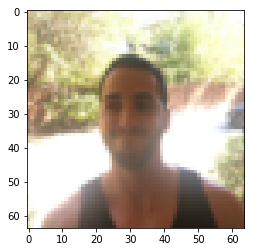

In [22]:
#Visualising the data
i = random.randint(1,600) # select any random index from 1 to 600
plt.imshow( X_train[i] )
print(y_train[i])

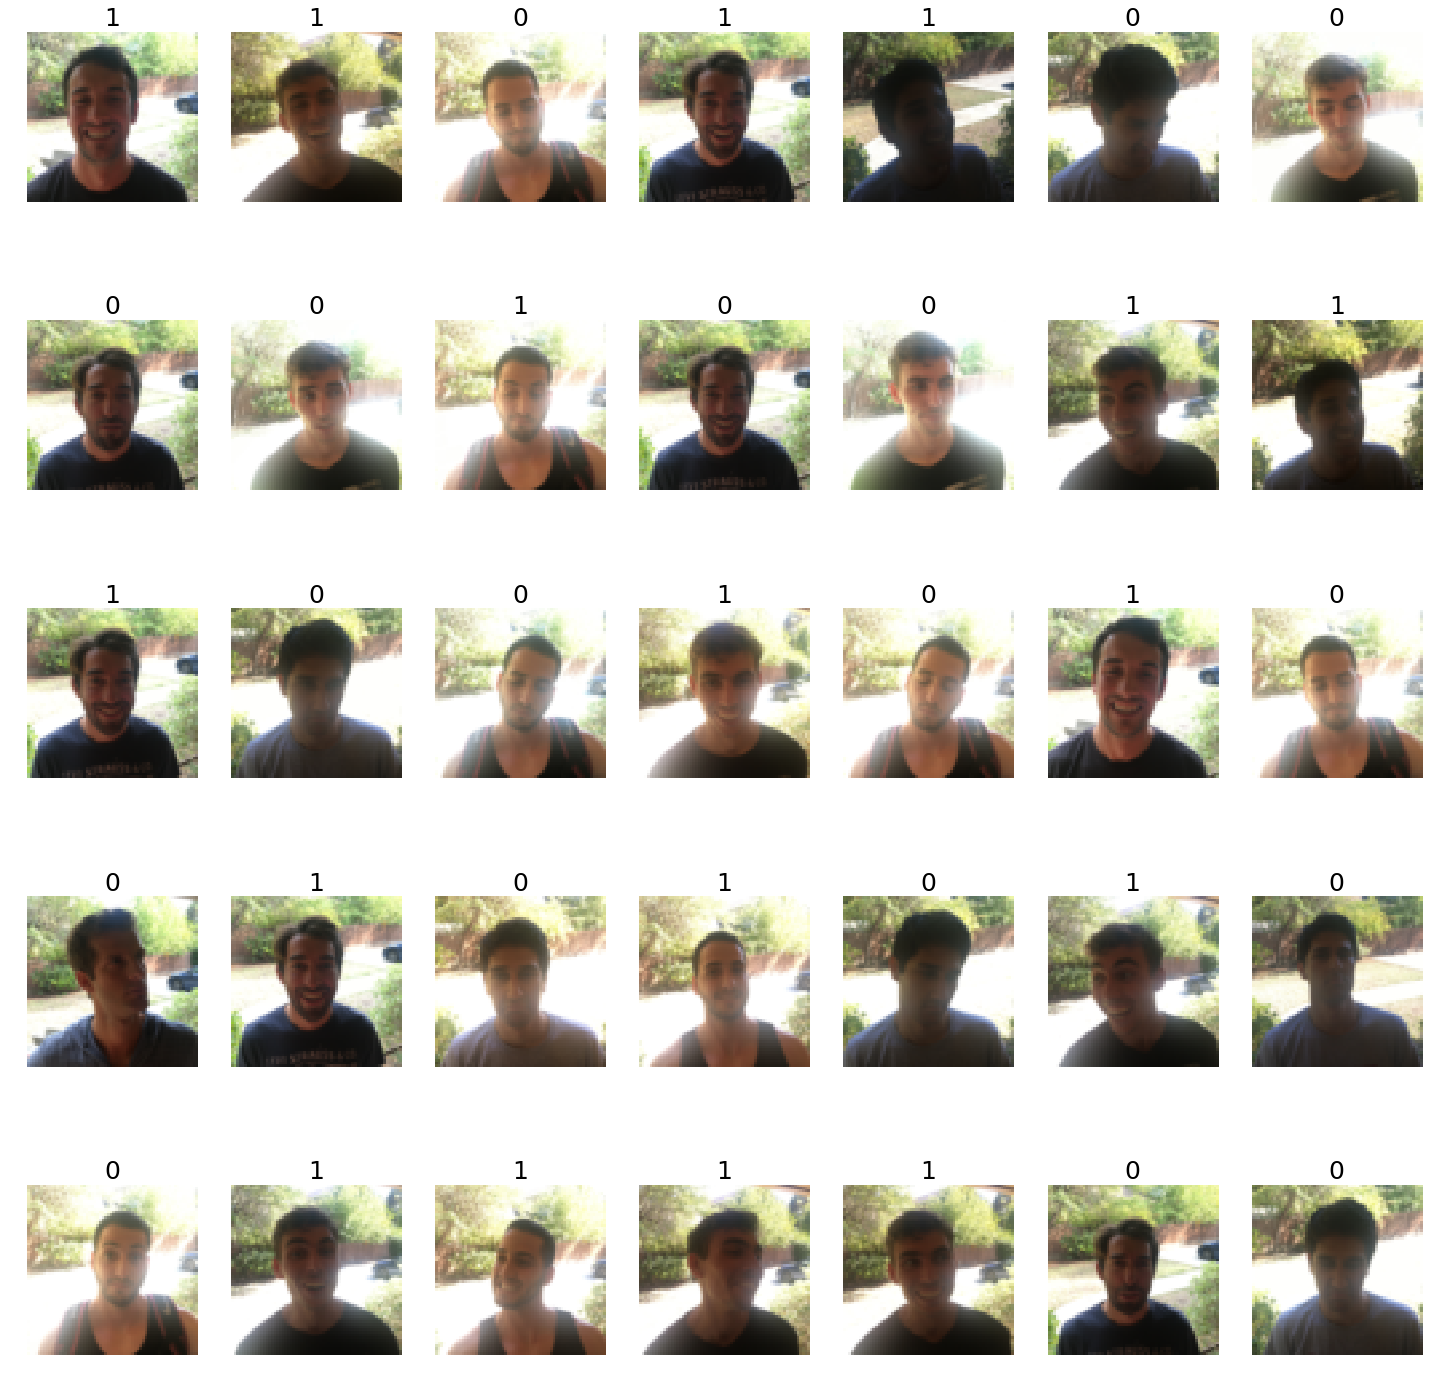

In [24]:
W_grid = 7
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel() #flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) #get the length of the training dataset

#Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): #create evenly spaces variables 

    #Select a random number
    index = np.random.randint(0, n_training)
    #read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [26]:
#Model Training

X_train = X_train/255
X_test = X_test/255

In [27]:
X_train

array([[[[0.69803922, 0.74509804, 0.63921569],
         [0.6745098 , 0.70980392, 0.67843137],
         [0.7372549 , 0.76862745, 0.72156863],
         ...,
         [1.        , 1.        , 0.99607843],
         [0.99607843, 1.        , 0.98039216],
         [0.97647059, 0.99215686, 0.87058824]],

        [[0.72156863, 0.78823529, 0.64705882],
         [0.58431373, 0.60392157, 0.55686275],
         [0.58431373, 0.61960784, 0.54509804],
         ...,
         [1.        , 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98039216],
         [0.98431373, 1.        , 0.90196078]],

        [[0.77647059, 0.81176471, 0.64705882],
         [0.55294118, 0.57647059, 0.50196078],
         [0.65882353, 0.72156863, 0.60392157],
         ...,
         [0.99215686, 1.        , 0.95686275],
         [0.99607843, 1.        , 0.97254902],
         [0.99215686, 1.        , 0.91372549]],

        ...,

        [[0.30196078, 0.32156863, 0.34901961],
         [0.23529412, 0.25098039, 0.26666667]

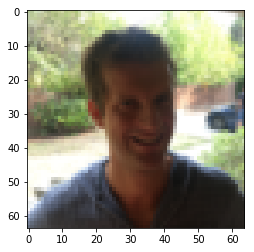

In [28]:
plt.imshow(X_train[9])

In [29]:
X_train.shape

(600, 64, 64, 3)

In [30]:
y_train.shape

(600,)

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [32]:
cnn_model = Sequential()

W0924 00:23:54.136713 11116 deprecation_wrapper.py:119] From C:\Users\Vignesh\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [33]:
cnn_model.add(Conv2D(64, 6, 6, input_shape = (64,64,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(64, 5, 5, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 128, activation = 'relu'))
cnn_model.add(Dense(output_dim = 1, activation = 'sigmoid'))

C:\Users\Vignesh\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (6, 6), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.
W0924 00:24:10.629505 11116 deprecation_wrapper.py:119] From C:\Users\Vignesh\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:519: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0924 00:24:10.637519 11116 deprecation_wrapper.py:119] From C:\Users\Vignesh\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4140: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0924 00:24:10.659395 11116 deprecation_wrapper.py:119] From C:\Users\Vignesh\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3978: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W092

In [34]:
cnn_model.compile(loss ='binary_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

W0924 00:24:21.242673 11116 deprecation_wrapper.py:119] From C:\Users\Vignesh\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0924 00:24:21.247703 11116 deprecation_wrapper.py:119] From C:\Users\Vignesh\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3378: The name tf.log is deprecated. Please use tf.math.log instead.

W0924 00:24:21.251648 11116 deprecation.py:323] From C:\Users\Vignesh\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [36]:
epochs = 20
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 30,
                        nb_epoch = epochs,
                        verbose = 1)

Epoch 1/20
420/600 [====================>.........] - ETA: 0s - loss: 0.2408 - acc: 0.8857

C:\Users\Vignesh\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


600/600 [==============================] - 0s 436us/step - loss: 0.2362 - acc: 0.9000
Epoch 2/20
600/600 [==============================] - 0s 440us/step - loss: 0.2081 - acc: 0.9150
Epoch 3/20
600/600 [==============================] - 0s 532us/step - loss: 0.2317 - acc: 0.9117
Epoch 4/20
600/600 [==============================] - 0s 554us/step - loss: 0.1782 - acc: 0.9417
Epoch 5/20
600/600 [==============================] - 0s 417us/step - loss: 0.1560 - acc: 0.9300
Epoch 6/20
600/600 [==============================] - 0s 413us/step - loss: 0.1570 - acc: 0.9467
Epoch 7/20
600/600 [==============================] - 0s 404us/step - loss: 0.1254 - acc: 0.9483
Epoch 8/20
600/600 [==============================] - 0s 436us/step - loss: 0.1082 - acc: 0.9667
Epoch 9/20
600/600 [==============================] - 0s 445us/step - loss: 0.1162 - acc: 0.9683
Epoch 10/20
600/600 [==============================] - 0s 525us/step - loss: 0.1096 - acc: 0.9500
Epoch 11/20
600/600 [===================

In [37]:
#Evaluating
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

150/150 [==============================] - 0s 3ms/step
Test Accuracy : 0.920


In [38]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

In [39]:
predicted_classes.shape

(150, 1)

In [40]:
y_test.shape

(150,)

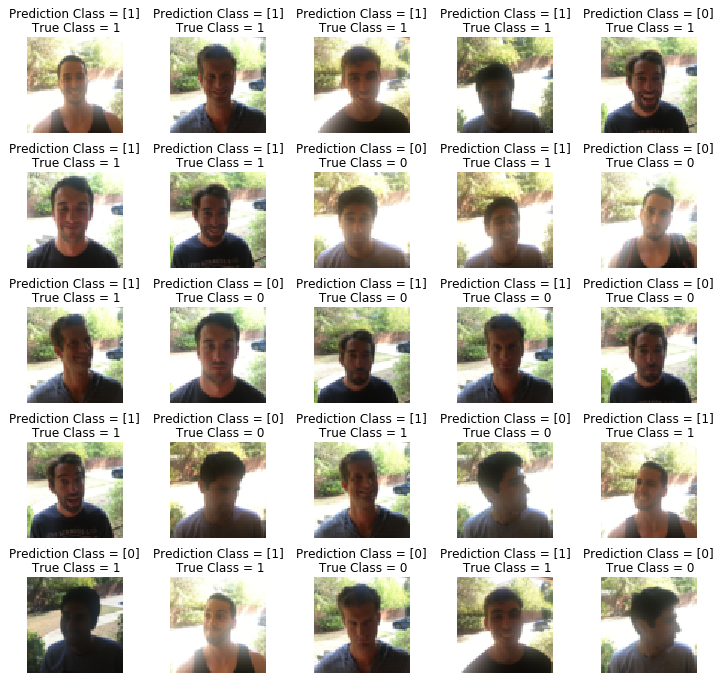

In [41]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

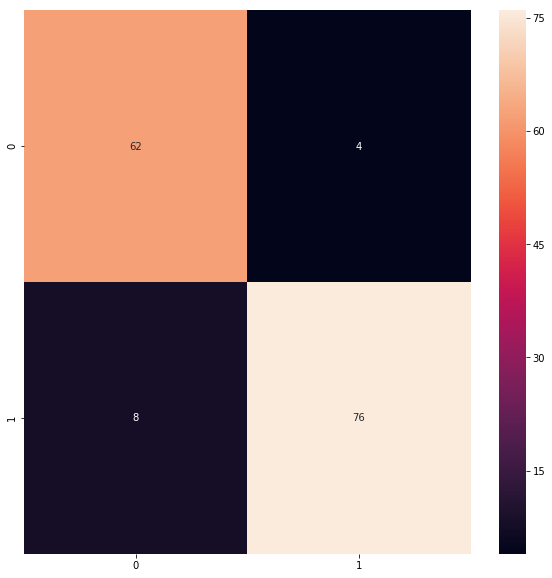

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test.T, predicted_classes))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        66
           1       0.95      0.90      0.93        84

   micro avg       0.92      0.92      0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

